In [178]:
import warnings
warnings.filterwarnings("ignore")
# loading packages
# 1 basic
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# 1. get the data

In [179]:
train_df=pd.read_csv('train.csv')
store_df=pd.read_csv('store.csv')
test_df=pd.read_csv('test.csv')

# 2. check dataset information

In [180]:

train_df.head()
train_df.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
store_df.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType               

# 3. try to find the outliers

In [181]:
def check_unique(data):
    for column in data.columns:
        print('{}  unique values quantity: '.format(column),len(data[column].unique()))

## 3.1 check store data set

In [182]:
check_unique(store_df)

Store  unique values quantity:  1115
StoreType  unique values quantity:  4
Assortment  unique values quantity:  3
CompetitionDistance  unique values quantity:  655
CompetitionOpenSinceMonth  unique values quantity:  13
CompetitionOpenSinceYear  unique values quantity:  24
Promo2  unique values quantity:  2
Promo2SinceWeek  unique values quantity:  25
Promo2SinceYear  unique values quantity:  8
PromoInterval  unique values quantity:  4


In [183]:
# CompetitionOpenSinceMonth  can not be 13 different values
np.sort(store_df['CompetitionOpenSinceMonth'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [184]:
np.sort(store_df['CompetitionOpenSinceYear'].unique())

array([1900., 1961., 1990., 1994., 1995., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015.,   nan])

## 3.2 check train data set

In [185]:
check_unique(train_df)

Store  unique values quantity:  1115
DayOfWeek  unique values quantity:  7
Date  unique values quantity:  942
Sales  unique values quantity:  21734
Customers  unique values quantity:  4086
Open  unique values quantity:  2
Promo  unique values quantity:  2
StateHoliday  unique values quantity:  5
SchoolHoliday  unique values quantity:  2


In [186]:
# StateHoliday  unique values quantity:  5,,this can not be 5
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [187]:
train_df['StateHoliday']=train_df.StateHoliday.map({'0':'none',0:'none','a':'public holiday','b':'Easter','c':'Christmas'})
train_df['StateHoliday'].unique()

array(['none', 'public holiday', 'Easter', 'Christmas'], dtype=object)

## 3.2 check test data set

In [188]:
check_unique(test_df)

Id  unique values quantity:  41088
Store  unique values quantity:  856
DayOfWeek  unique values quantity:  7
Date  unique values quantity:  48
Open  unique values quantity:  3
Promo  unique values quantity:  2
StateHoliday  unique values quantity:  2
SchoolHoliday  unique values quantity:  2


In [189]:
test_df['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [190]:
test_df['Open'].unique()

array([ 1., nan,  0.])

## 3.3 check missing data (Nan)

In [191]:
def check_Nan(data):
    print('{:*^50}'.format("the columns includ Nan"))
    # 判断那些列含缺失值,横向走，看每一列是否含有TRUE，返回的是一个series，（列名称，true/false），有一个TRUE就返回TRUE，否则false
    print(data.isnull().any(axis=0))
    print('{:*^50}'.format("the quantity of row include Nan"))
    print(data.isnull().any(axis=1).sum())

In [192]:
check_Nan(store_df)

**************the columns includ Nan**************
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool
*********the quantity of row include Nan**********
750


In [193]:
check_Nan(train_df)

**************the columns includ Nan**************
Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
*********the quantity of row include Nan**********
0


### conclusion: we found that the store_df include some missing data, I guess this because there is no competition, if the speculation is right, then, the everything about competition is Nan, like CompetitionDistance,CompetitionOpenSinceMonth.etc. 
### another speculation is if prom2 is 0, then the corresponding data like Promo2SinceWeek should be Nan.
### we need to verify the guesses

In [194]:
def check_none_together(data,columns):
    indexes=[]
    indexes_len=[]
    for column in columns:
        index=data[data[column].isnull()].index # 找出每列有空值的行索引
        indexes_len.append(len(index))# 计算每列的缺失值的数量
        indexes.append(index)# 保留每一列缺失值的索引
    if set(indexes[0])==set(indexes[1]) and set(indexes[1])==set(indexes[2]):
        print("all of this row is Nan")
    else:
         print(indexes_len[0],indexes_len[1],indexes_len[2])#不一样，则把每个列缺失行数打印出来
    return indexes

In [195]:
index_1=check_none_together(store_df,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])

3 354 354


In [196]:
# check if those two is Nan in same row
index_2=check_none_together(store_df,['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])

all of this row is Nan


In [197]:
# show the NaN row in the CompetitionDistance
store_df.iloc[index_1[0].values] 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [198]:
store_df.iloc[index_1[1].values].sample(5) 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
187,188,d,a,850.0,NaN,NaN,1,18.0,2011.0,"Feb,May,Aug,Nov"
679,680,c,a,170.0,NaN,NaN,1,35.0,2012.0,"Mar,Jun,Sept,Dec"
950,951,d,c,710.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
104,105,a,c,6190.0,NaN,NaN,1,23.0,2013.0,"Mar,Jun,Sept,Dec"
590,591,a,c,3340.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


#### conclusion: in the case of no competitor, the rest of CompetitionOpenSinceMonth and CompetitionOpenSinceYear empty values should be no records, but there are actually relevant data

In [199]:
# check promo2 and the correspoding data
index_3=check_none_together(store_df,['Promo2SinceWeek','Promo2SinceYear','PromoInterval'])
sum(store_df.iloc[index_3[0]]['Promo2']!=0)#检验空值行的Promo2是否都为0

all of this row is Nan


0

#### conclusion: if promo2==0, then the corresponding data is NaN.

# 3 merge store and train together

In [200]:
data_train_new=pd.merge(train_df,store_df,on='Store',how='left')
data_train_new.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,none,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,none,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [201]:
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [202]:
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,none,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,none,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 4 exploratory data analysis

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
data_train_new.groupby('Store')['Sales'].head()

0        5263
1        6064
2        8314
3       13995
4        4822
        ...  
5570     7742
5571    14383
5572     7582
5573    26720
5574    10712
Name: Sales, Length: 5575, dtype: int64

Text(0.5, 6.79999999999999, 'Total Sales')

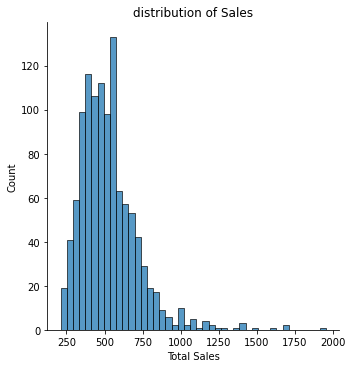

In [205]:
df1=data_train_new.groupby('Store')['Sales'].sum()/10000 # https://zhuanlan.zhihu.com/p/101284491
sns.displot(df1)# https://zhuanlan.zhihu.com/p/33977558
plt.title('distribution of Sales')
plt.xlabel('Total Sales')

## 4.1 the connection between Sales and time

#### 4.1.1  mean Sale of every day

   DayOfWeek        Sales
0          1  7809.044510
1          2  7005.244467
2          3  6555.884138
3          4  6247.575913
4          5  6723.274305
5          6  5847.562599
6          7   204.183189


Text(0.5, 1.0, 'Sales in different day of week')

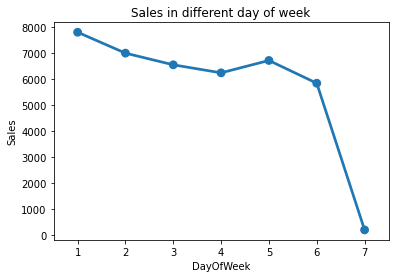

In [206]:
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
print(df2)
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('Sales in different day of week')


#### conclusion: we can see the Salese reduces with the time changes from Monday to Sunday. on Sunday most of the store do not open

#### 4.1.2 weekly average operating rate

In [207]:
df3 = data_train_new.groupby("DayOfWeek")['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
print(df3)

   DayOfWeek  open_rate
0          1   0.950459
1          2   0.988309
2          3   0.974400
3          4   0.923199
4          5   0.950598
5          6   0.995357
6          7   0.024826


Text(0.5, 1.0, 'average perating rate of a week')

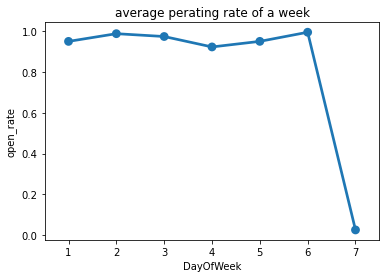

In [208]:
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('average perating rate of a week')


#### conclusion: this means that few store open at Sunday

#### 4.1.3 probing monthly average sales

In [209]:
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,none,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,none,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Text(0.5, 1.0, 'monthly average sales')

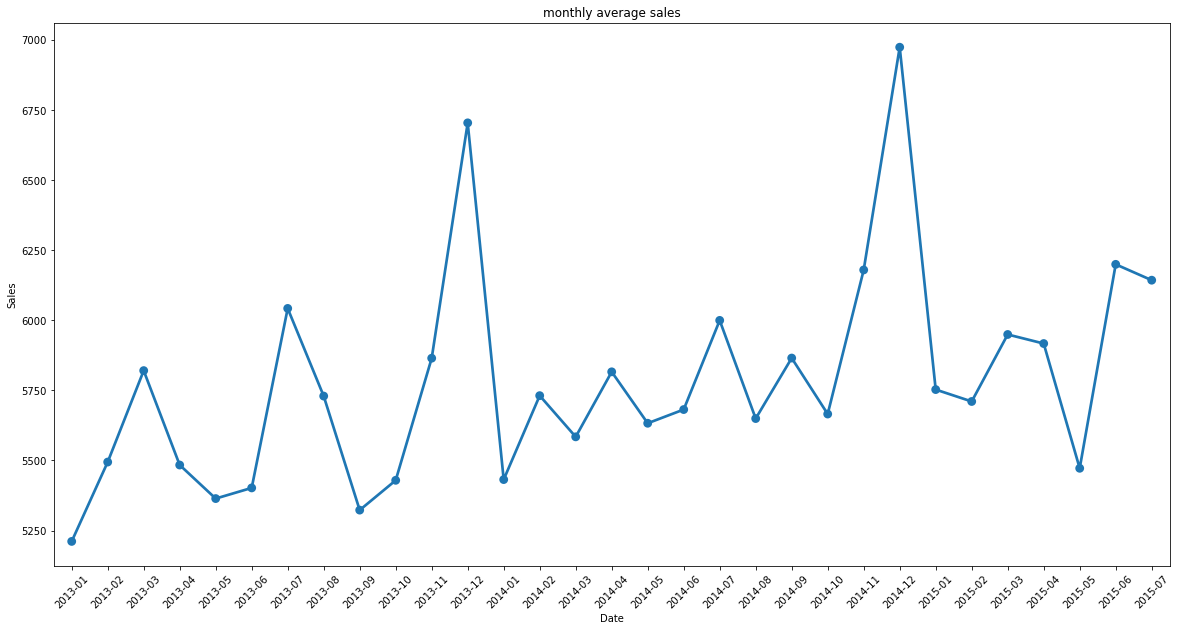

In [210]:
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M',kind='period').mean().reset_index()#https://zhuanlan.zhihu.com/p/70353374
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df4,x='Date',y='Sales',ax=ax)
plt.xticks(rotation=45)# 斜体
ax.set_title('monthly average sales')

#### it can be seen that October-December is a period of rapid growth, reaching the peak in December and reaching the bottom in January. And the overall fluctuations are relatively obvious, and the fluctuations in different years are also different.

#### 4.1.4 processing date

In [211]:
data_train_new['year']=data_train_new.Date.map(lambda x:x.year)
data_train_new['month']=data_train_new.Date.map(lambda x:x.month)
data_train_new['day']=data_train_new.Date.map(lambda x:x.day)
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,none,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,none,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,none,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,none,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


Text(0.5, 1.0, 'monthly average sales (only month)')

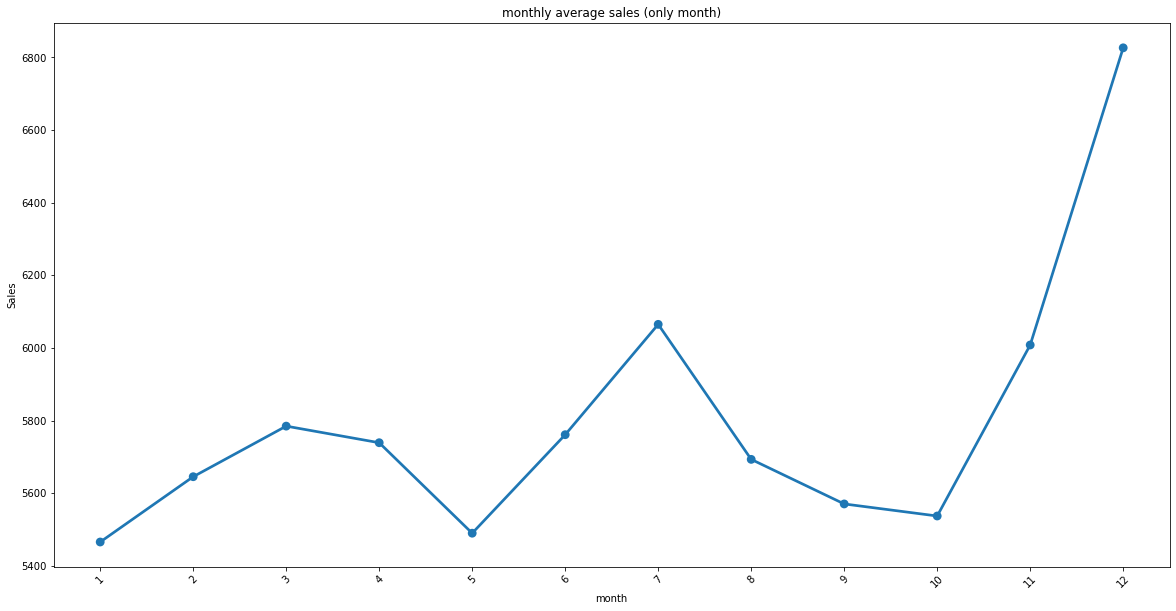

In [212]:
df5=data_train_new.groupby('month')['Sales'].mean().reset_index()
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df5,x='month',y='Sales',ax=ax)
plt.xticks(rotation=45)# 斜体
ax.set_title('monthly average sales (only month)')

#### 4.1.5 Average sales of each day in different month

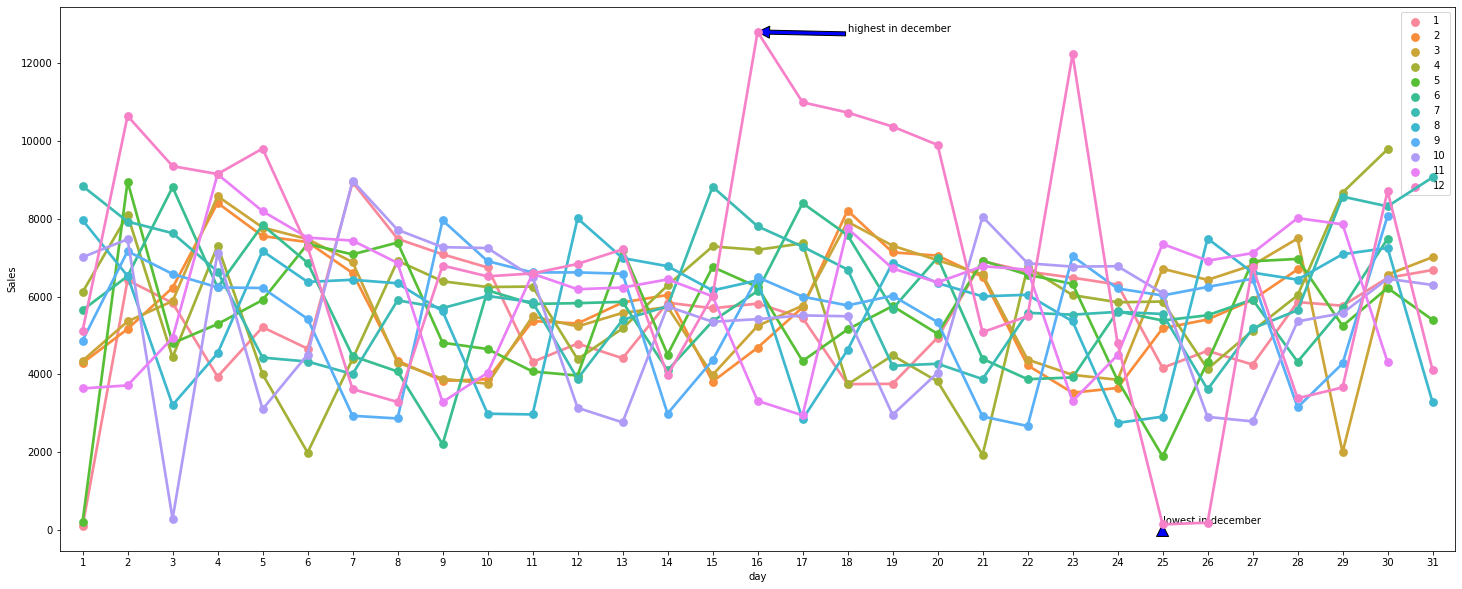

In [213]:
df6=data_train_new.Sales.groupby([data_train_new.month,data_train_new.day]).mean().reset_index()
df6.head()
fig=plt.figure(figsize=(25,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(x='day',y='Sales',hue='month',data=df6,ax=ax)

dec_max=df6[df6.month==12].Sales.max()
dec_min=df6[df6.month==12].Sales.min()
plt.annotate('highest in december',xy=(15,dec_max),xytext=(17,dec_max),arrowprops={'facecolor':'b'})
plt.annotate('lowest in december',xy=(24,dec_min),xytext=(24,dec_min),arrowprops={'facecolor':'b'})
plt.legend(loc='upper right')

#### conclusion: it can be seen that the volatility is the most violent in December. looking at the whole December,thre is only a big difference between the 16th and the 26th and other monthes. it showes that December is generally higher than other monthes because of the huge fluctuations during this period(16th and 26th).

## 4.2 probing analyze in promotional characteristic and competitor

### 4.2.1 probing relationship between distance with competitor and Sales

,CompetitionDistance,Sales
Store,,
1,7.146772,3716.854
2,6.345636,3883.858
3,9.556055,5408.261
4,6.429719,7556.507
5,10.305948,3642.818


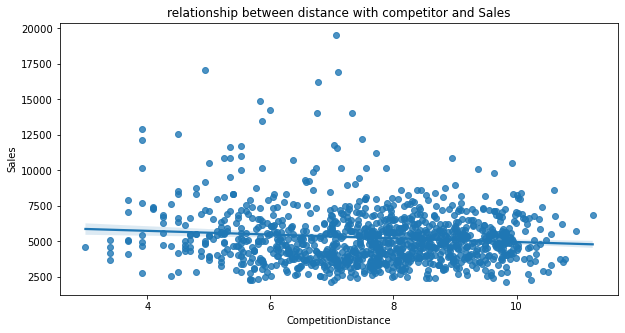

In [214]:
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x)) # 距离取log，同比缩小
df7['Sales']=df7['Sales'].map(lambda x:x/1000)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('relationship between distance with competitor and Sales')
df7.head()

### conlusion it can be seen that there is no strong connection between competition distance and Sales, at the same distance, some stores get high sales and some stores get low sales.

### 4.2.2 Distribution of shop promotion times

<AxesSubplot:xlabel='Promo', ylabel='Density'>

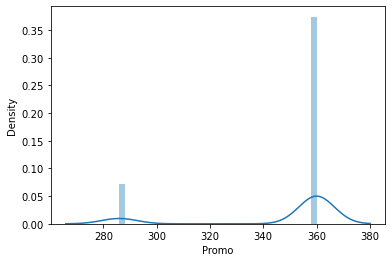

In [215]:
df8=data_train_new.groupby('Store')['Promo'].sum()
df8.head()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.distplot(df8,ax=ax)

[Text(0.5, 1.0, 'promotion times distribution')]

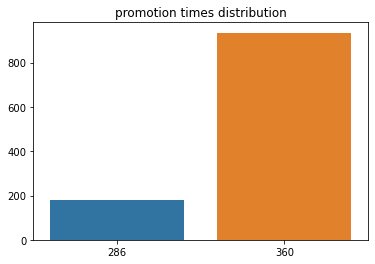

In [216]:
df9=df8.value_counts()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.barplot(df9.index,df9.values,ax=ax)
ax.set(**{'title':'promotion times distribution'})

### conclusion: there are two kinds of promotion styles

[Text(0.5, 1.0, 'Sales difference between promotion day and non promotion day')]

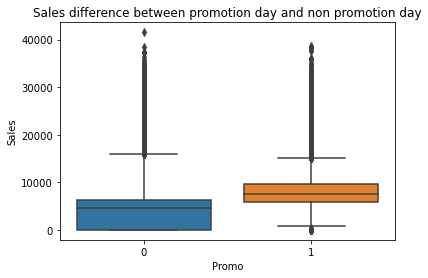

In [217]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new,ax=ax)
ax.set(**{'title':'Sales difference between promotion day and non promotion day'})

[Text(0.5, 1.0, 'Sales over 20000 difference between promotion day and non promotion day')]

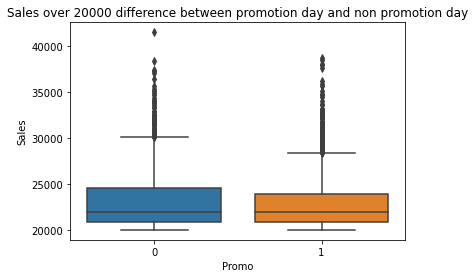

In [218]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(x='Promo',y='Sales',data=data_train_new[data_train_new.Sales>=20000],ax=ax)
ax.set(**{'title':'Sales over 20000 difference between promotion day and non promotion day'})

### conclusion: it can be seen that promotion promotes the Sales only when the sales below 20000. promotion can not help to promote sales from 20000 to higher.

### 4.2.3 how promo2 affect the sales

<AxesSubplot:title={'center':'Comparison of the number of stores with or without promo2'}>

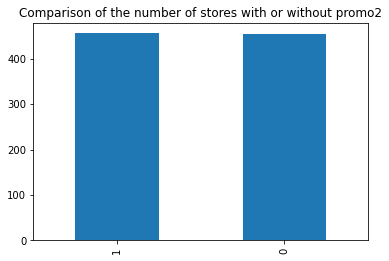

In [219]:
df10=data_train_new.Promo2.value_counts()/1116
df10.plot(kind='bar',title='Comparison of the number of stores with or without promo2')

[Text(0.5, 1.0, 'Sales difference between with promo2 and without promo2')]

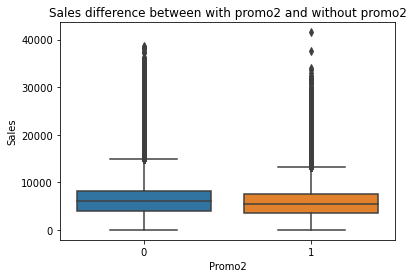

In [220]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(x='Promo2',y='Sales',data=data_train_new,ax=ax)
ax.set(**{'title':'Sales difference between with promo2 and without promo2'})

[Text(0.5, 1.0, 'average sales over 10000 comparison between with and without promo2')]

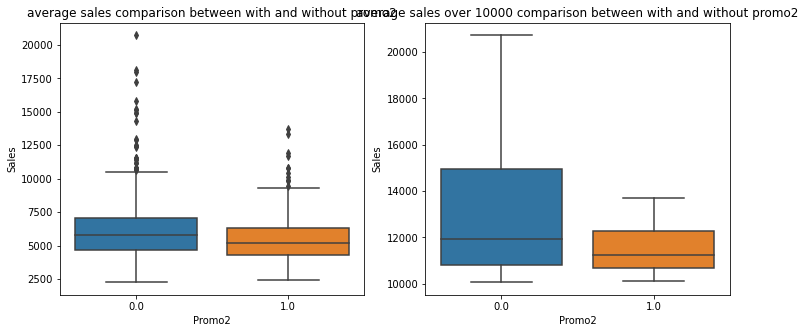

In [221]:
df11=data_train_new.groupby('Store')['Promo2','Sales'].mean()
fig=plt.figure(figsize=(12,5))
ax=fig.subplots(1,2)
sns.boxplot(x='Promo2',y='Sales',data=df11,ax=ax[0])
sns.boxplot(x='Promo2',y='Sales',data=df11[df11.Sales>=10000],ax=ax[1])
ax[0].set(**{'title':'average sales comparison between with and without promo2'})
ax[1].set(**{'title':'average sales over 10000 comparison between with and without promo2'})


### conclusion: it can be seen that the average sales of stores with promo2 are slightly better than those without.and for those average sales are greater than 10000,the sales of stores without promo2 are better overall

### 4.2.4. How holiday affects sales


[Text(0.5, 1.0, 'distribution of Sales of  stateHoliday and open')]

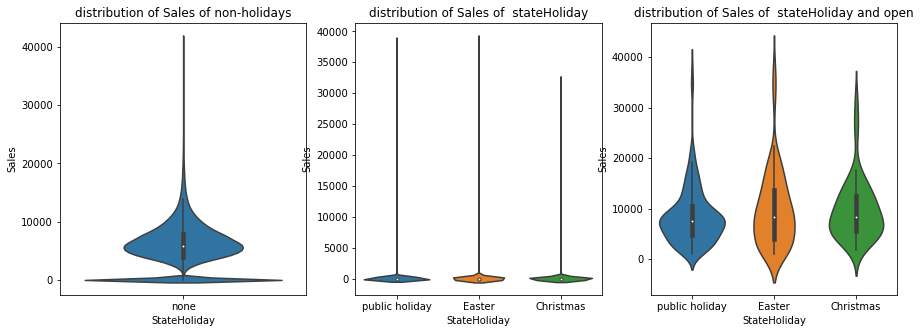

In [222]:
# state Holiday
fig=plt.figure(figsize=(15,5))
ax=fig.subplots(1,3)
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday=='none'],ax=ax[0])
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='none'],ax=ax[1])
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[(data_train_new.StateHoliday!='none')&(data_train_new.Sales>0)],ax=ax[2])
ax[0].set(**{'title':'distribution of Sales of non-holidays'})
ax[1].set(**{'title':'distribution of Sales of  stateHoliday'})
ax[2].set(**{'title':'distribution of Sales of  stateHoliday and open'})

### conclusion:  there is basically no sales during holidays, which means most stores are cloesd during holidays. and the distribution of open stores is similar to that of non-holidays.Since there are relatively few holidays data, the distribution of non-holidays is also more scattered. it can be seen that whether the holidays are open or not has little impact on sales.

In [223]:
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,none,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,none,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,none,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,none,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


[Text(0.5, 1.0, 'distribution of Sales of  SchoolHoliday')]

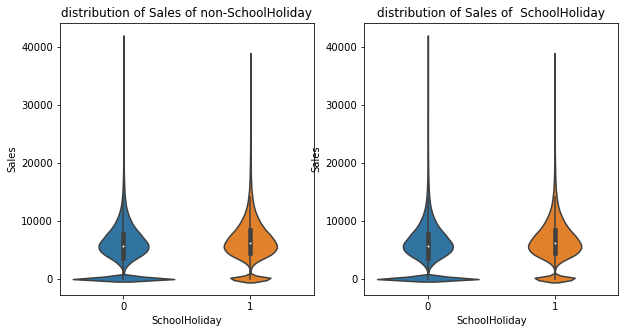

In [224]:
# school holiday
fig=plt.figure(figsize=(10,5))
ax=fig.subplots(1,2)
sns.violinplot(y='Sales',x='SchoolHoliday',data=data_train_new,ax=ax[0])
sns.violinplot(y='Sales',x='SchoolHoliday',data=data_train_new,ax=ax[1])
ax[0].set(**{'title':'distribution of Sales of non-SchoolHoliday'})
ax[1].set(**{'title':'distribution of Sales of  SchoolHoliday'})

### conclusion: it can be seen that the school holiday has little impact on sales

### 4.2.5 How store type affects sales

[Text(0.5, 1.0, 'distribution of Sales of StoreType')]

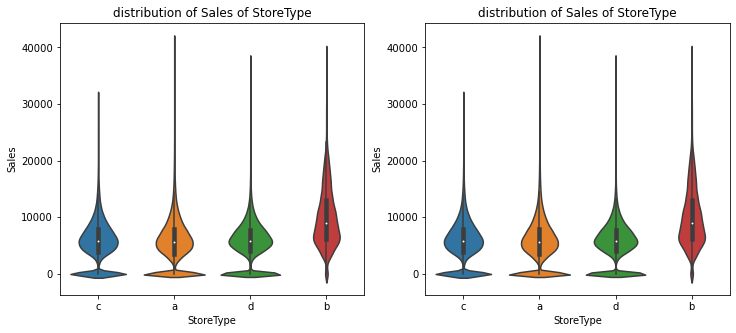

In [225]:
# store type
fig=plt.figure(figsize=(12,5))
ax=fig.subplots(1,2)
sns.violinplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[0])
sns.violinplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[1])
ax[0].set(**{'title':'distribution of Sales of StoreType'})
ax[1].set(**{'title':'distribution of Sales of StoreType'})

### conclusion: for store type, it can be seen that the sales volume of type b is higher than that of other types, and there is basically no difference between types a,c and d.

[Text(0.5, 1.0, 'distribution of Sales of Assortment')]

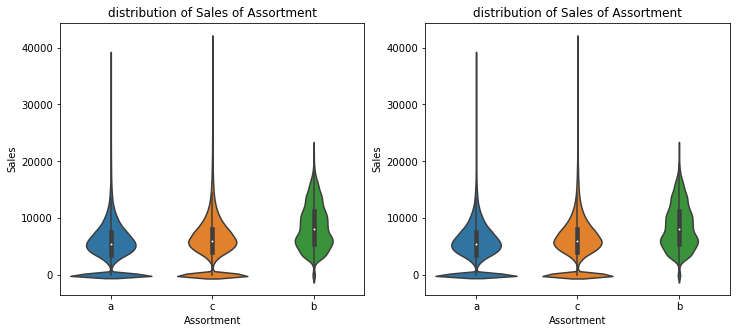

In [226]:
# Assortment
fig=plt.figure(figsize=(12,5))
ax=fig.subplots(1,2)
sns.violinplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[0])
sns.violinplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[1])
ax[0].set(**{'title':'distribution of Sales of Assortment'})
ax[1].set(**{'title':'distribution of Sales of Assortment'})

### conclusion: for assortment, it can be seen that the sales volume of type b is higher than that of other types, and there is slightly difference between types a,c.

### 4.2.6 How number of customers affects sales

[Text(0.5, 1.0, 'How number of customers affects sales')]

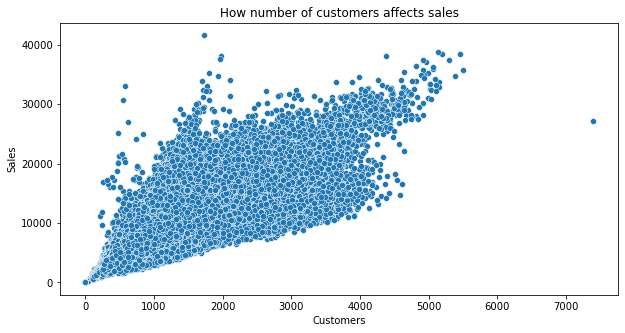

In [227]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.scatterplot(y='Sales',x='Customers',data=data_train_new,ax=ax)
# data_train_new.plot.scatter(y='Sales',x='Customers',ax=ax)
ax.set(**{'title':'How number of customers affects sales'})

### conclusion: overall.the number of customers and sales are positively corrected

# 5. Feature Engineering

## 5.1 check and handle outliers

In [228]:
train_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
133918,119,4,2015-04-02,9317,901,1,1,none,1
785811,522,6,2013-07-27,8205,656,1,0,none,0
316116,319,2,2014-10-07,7439,761,1,1,none,0
638340,231,5,2013-12-06,5811,443,1,1,none,0
245113,380,1,2014-12-22,21864,1942,1,0,none,1
173738,914,4,2015-02-26,9859,1217,1,0,none,0
779360,761,5,2013-08-02,8852,1056,1,1,none,1
606425,651,6,2014-01-04,7178,936,1,0,none,0
136463,434,2,2015-03-31,12569,731,1,1,none,1
231756,952,1,2015-01-05,10715,747,1,1,none,1


In [229]:
test_df.sample(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
25828,25829,193,2,2015-08-18,1.0,1,0,1
15451,15452,58,7,2015-08-30,0.0,0,0,0
32616,32617,118,1,2015-08-10,1.0,0,0,1
6048,6049,74,4,2015-09-10,1.0,0,0,0
27897,27898,656,7,2015-08-16,0.0,0,0,1
30790,30791,1083,4,2015-08-13,1.0,0,0,1
9532,9533,154,7,2015-09-06,0.0,0,0,0
8189,8190,629,2,2015-09-08,1.0,0,0,1
36200,36201,325,4,2015-08-06,1.0,1,0,1
25273,25274,580,3,2015-08-19,1.0,1,0,1


##### there is no customers in test,it need to be droped

In [230]:
train_df=train_df.drop('Customers',axis=1)

##### let the data keep consistent both in train_df and test_df

In [231]:
test_df.StateHoliday=test_df.StateHoliday.map({'0':'none',0:'none','a':'public holiday','b':'Easter','c':'Christmas'})

In [232]:
# connect train_df and test_df
data_train_test=pd.concat([train_df,test_df.drop('Id',axis=1)],axis=0,ignore_index=True)
data_train_test.sample(10)

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
856839,190,5,2013-05-24,6243.0,1.0,0,none,1
517128,554,2,2014-03-25,4059.0,1.0,0,none,0
931033,794,2,2013-03-19,2780.0,1.0,1,none,0
882335,41,3,2013-05-01,0.0,0.0,1,public holiday,0
126732,738,4,2015-04-09,6732.0,1.0,0,none,1
624614,1000,4,2013-12-19,8563.0,1.0,1,none,0
559540,596,6,2014-02-15,4083.0,1.0,0,none,0
624422,808,4,2013-12-19,12591.0,1.0,1,none,0
466317,1033,6,2014-05-10,10000.0,1.0,0,none,0
220925,156,3,2015-01-14,7441.0,1.0,1,none,0


In [233]:
# connect store and train_test
data_train_test=pd.merge(data_train_test,store_df,on='Store',how='left')
data_train_test.sample(10)

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
167369,120,2,2015-03-03,8821.0,1.0,1,none,0,d,a,2290.0,12.0,2014.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
225352,123,6,2015-01-10,3611.0,1.0,0,none,0,a,a,16760.0,9.0,2011.0,0,NaN,NaN,NaN
804480,236,3,2013-07-10,5426.0,1.0,0,none,1,a,a,1000.0,11.0,2007.0,0,NaN,NaN,NaN
787688,169,4,2013-07-25,6802.0,1.0,0,none,1,d,a,980.0,7.0,2014.0,1,18.0,2014.0,"Feb,May,Aug,Nov"
632996,462,3,2013-12-11,5952.0,1.0,0,none,0,a,a,44320.0,8.0,2008.0,0,NaN,NaN,NaN
65940,156,2,2015-06-02,9279.0,1.0,1,none,0,a,a,2020.0,2.0,2011.0,1,14.0,2011.0,"Mar,Jun,Sept,Dec"
597267,413,7,2014-01-12,0.0,0.0,0,none,0,a,c,760.0,9.0,2014.0,0,NaN,NaN,NaN
159760,316,2,2015-03-10,7379.0,1.0,0,none,0,d,a,9000.0,8.0,2001.0,0,NaN,NaN,NaN
102230,766,5,2015-05-01,0.0,0.0,1,public holiday,0,d,c,9820.0,NaN,NaN,0,NaN,NaN,NaN
831673,669,7,2013-06-16,0.0,0.0,0,none,0,d,a,17080.0,7.0,2012.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [234]:
data_train_test.Date=pd.to_datetime(data_train_test.Date)
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 1058296
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1058297 non-null  int64         
 1   DayOfWeek                  1058297 non-null  int64         
 2   Date                       1058297 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Open                       1058286 non-null  float64       
 5   Promo                      1058297 non-null  int64         
 6   StateHoliday               1058297 non-null  object        
 7   SchoolHoliday              1058297 non-null  int64         
 8   StoreType                  1058297 non-null  object        
 9   Assortment                 1058297 non-null  object        
 10  CompetitionDistance        1055559 non-null  float64       
 11  CompetitionOpenSinceMonth  719733 non

In [235]:
# divide date into year month day
data_train_test['year']=data_train_test.Date.map(lambda x:x.year)
data_train_test['month']=data_train_test.Date.map(lambda x:x.month)
data_train_test['day']=data_train_test.Date.map(lambda x:x.day)
data_train_test['Date']=data_train_test.Date.map(lambda x:x.date())

In [236]:
check_Nan(data_train_test)

**************the columns includ Nan**************
Store                        False
DayOfWeek                    False
Date                         False
Sales                         True
Open                          True
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
year                         False
month                        False
day                          False
dtype: bool
*********the quantity of row include Nan**********
733971


##### it is found that there is at least a null value in the open column, because the train set has been processed with null values before, so the null values must come from the test set. because open directly determines the sales, so it it necessary to fill in the null value carefully. 

In [237]:
sum(data_train_test.Open.isnull())

11

In [238]:
data_train_test[data_train_test.Open.isnull()]

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
1017688,622,4,2015-09-17,NaN,NaN,1,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
1018544,622,3,2015-09-16,NaN,NaN,1,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
1019400,622,2,2015-09-15,NaN,NaN,1,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
1020256,622,1,2015-09-14,NaN,NaN,1,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14
1021968,622,6,2015-09-12,NaN,NaN,0,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,12
1022824,622,5,2015-09-11,NaN,NaN,0,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,11
1023680,622,4,2015-09-10,NaN,NaN,0,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,10
1024536,622,3,2015-09-09,NaN,NaN,0,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,9
1025392,622,2,2015-09-08,NaN,NaN,0,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,8
1026248,622,1,2015-09-07,NaN,NaN,0,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,7


##### all those Nan come from store 622, firt if promo is 1, then open can not be NaN

In [239]:
data_train_test.loc[[1017688,1018544,1019400,1020256],'Open']=1
data_train_test.loc[[1017688,1018544,1019400,1020256]]#检查是否改正成功

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
1017688,622,4,2015-09-17,NaN,1.0,1,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
1018544,622,3,2015-09-16,NaN,1.0,1,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
1019400,622,2,2015-09-15,NaN,1.0,1,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
1020256,622,1,2015-09-14,NaN,1.0,1,none,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14


##### find out the date of null value,and draw a graph to see the operating conditions of other stores on that date

In [240]:
date_null=data_train_test[data_train_test.Open.isnull()].Date

In [241]:
print(date_null)

1021968    2015-09-12
1022824    2015-09-11
1023680    2015-09-10
1024536    2015-09-09
1025392    2015-09-08
1026248    2015-09-07
1027960    2015-09-05
Name: Date, dtype: object


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2015-09-05'),
  Text(1, 0, '2015-09-07'),
  Text(2, 0, '2015-09-08'),
  Text(3, 0, '2015-09-09'),
  Text(4, 0, '2015-09-10'),
  Text(5, 0, '2015-09-11'),
  Text(6, 0, '2015-09-12')])

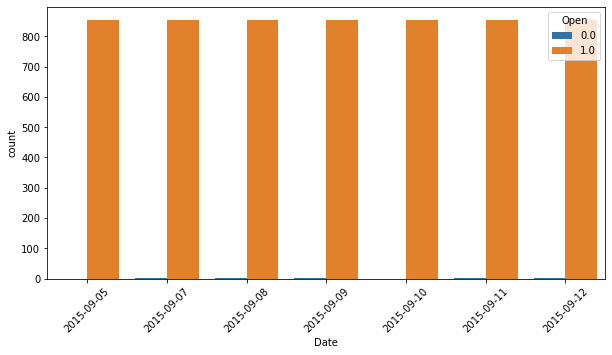

In [242]:
data_date_null=data_train_test[data_train_test.Date.isin(date_null)]
df12=data_date_null.groupby(['Date','Open'])['Store'].count().rename('count').reset_index()
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.barplot('Date','count',hue='Open',data=df12,ax=ax)
plt.xticks(rotation=45)

##### it looks those days almost all the other stores are open, so change those NaN into 1

In [243]:
index_null=data_train_test[data_train_test.Open.isnull()].index
data_train_test.loc[index_null,'Open']=1
sum(data_train_test.Open.isnull())# double check

0

##### check null values in each column

In [244]:
def chech_none_col(data,column):
    print('quantity of NaN value in {}'.format(column),sum(data[column].isnull()))
    print('ratio of NaN value in {}'.format(column),round(sum(data[column].isnull())/data.shape[0],3))
columns=['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for item in columns:
    chech_none_col(store_df,item)

quantity of NaN value in CompetitionDistance 3
ratio of NaN value in CompetitionDistance 0.003
quantity of NaN value in CompetitionOpenSinceMonth 354
ratio of NaN value in CompetitionOpenSinceMonth 0.317
quantity of NaN value in CompetitionOpenSinceYear 354
ratio of NaN value in CompetitionOpenSinceYear 0.317
quantity of NaN value in Promo2SinceWeek 544
ratio of NaN value in Promo2SinceWeek 0.488
quantity of NaN value in Promo2SinceYear 544
ratio of NaN value in Promo2SinceYear 0.488
quantity of NaN value in PromoInterval 544
ratio of NaN value in PromoInterval 0.488


##### check the correlation between those NaN value and Sales

In [245]:
data_tem=pd.concat([data_train_test[columns],data_train_test['Sales']],axis=1)

data_tem.corr()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Sales
CompetitionDistance,1.000000,-0.059595,0.025997,-0.055272,-0.108762,-0.019229
CompetitionOpenSinceMonth,-0.059595,1.000000,-0.059889,-0.034530,0.049577,-0.028257
CompetitionOpenSinceYear,0.025997,-0.059889,1.000000,-0.080417,0.010982,0.012659
Promo2SinceWeek,-0.055272,-0.034530,-0.080417,1.000000,-0.242425,0.059558
Promo2SinceYear,-0.108762,0.049577,0.010982,-0.242425,1.000000,-0.021127
Sales,-0.019229,-0.028257,0.012659,0.059558,-0.021127,1.000000


##### it can be seen that those columns have a slight impact on sales. in chis case, we can use mean value or mode to fill the NaN positions

In [246]:
data_safe=data_train_test
data_train_test.CompetitionDistance=data_train_test.CompetitionDistance.fillna(data_train_test.CompetitionDistance.mean())
for item in columns:
    data_train_test[item]=data_train_test[item].fillna(data_train_test[item].mode()[0])

In [247]:
check_Nan(data_train_test)

**************the columns includ Nan**************
Store                        False
DayOfWeek                    False
Date                         False
Sales                         True
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
year                         False
month                        False
day                          False
dtype: bool
*********the quantity of row include Nan**********
41088


## 5.2 data type conversion

In [248]:
data_train_test.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                        float64
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
year                           int64
month                          int64
day                            int64
dtype: object

### 5.2.1 convert float into integer

In [249]:
def convert_to_int(data,columns):
    for item in columns:
        data[item]=data[item].astype(np.int64)
    return data
columns_float=['Open','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']
data_train_test=convert_to_int(data_train_test,columns_float)
data_train_test.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                        float64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth      int64
CompetitionOpenSinceYear       int64
Promo2                         int64
Promo2SinceWeek                int64
Promo2SinceYear                int64
PromoInterval                 object
year                           int64
month                          int64
day                            int64
dtype: object

### 5.2.2 convert numerical data into categorical data

In [250]:
def convert_to_obj(data,columns):
    for item in columns:
        data[item]=data[item].astype(np.str)
    return data
columns_classify=['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','year','month','day']
data_train_test=convert_to_obj(data_train_test,columns_classify)
data_train_test.dtypes

Store                          int64
DayOfWeek                     object
Date                          object
Sales                        float64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth     object
CompetitionOpenSinceYear      object
Promo2                         int64
Promo2SinceWeek               object
Promo2SinceYear               object
PromoInterval                 object
year                          object
month                         object
day                           object
dtype: object

In [251]:
data_safe=data_train_test

## 5.3 feature processing

In [252]:
check_unique(data_train_test)

Store  unique values quantity:  1115
DayOfWeek  unique values quantity:  7
Date  unique values quantity:  990
Sales  unique values quantity:  21735
Open  unique values quantity:  2
Promo  unique values quantity:  2
StateHoliday  unique values quantity:  4
SchoolHoliday  unique values quantity:  2
StoreType  unique values quantity:  4
Assortment  unique values quantity:  3
CompetitionDistance  unique values quantity:  655
CompetitionOpenSinceMonth  unique values quantity:  12
CompetitionOpenSinceYear  unique values quantity:  23
Promo2  unique values quantity:  2
Promo2SinceWeek  unique values quantity:  24
Promo2SinceYear  unique values quantity:  7
PromoInterval  unique values quantity:  3
year  unique values quantity:  3
month  unique values quantity:  12
day  unique values quantity:  31


In [254]:
data_train_test['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     832161
Feb,May,Aug,Nov     124308
Mar,Jun,Sept,Dec    101828
Name: PromoInterval, dtype: int64

##### classification data binarization 

In [256]:
def convert_to_twovalues(data,columns):
    connect_column=[]
    for item in columns:
        df_tem=pd.get_dummies(data[item],prefix=item)
        connect_column.append(df_tem)
    data_new=pd.concat(connect_column,axis=1)
    return data_new

In [258]:
columns_value_processing=['DayOfWeek','StateHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                          'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','year','month','day']
data_value_processing=convert_to_twovalues(data_train_test,columns_value_processing)
data_value_processing

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_Christmas,StateHoliday_Easter,StateHoliday_none,...,day_29,day_3,day_30,day_31,day_4,day_5,day_6,day_7,day_8,day_9
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058292,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1058293,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1058294,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1058295,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


##### normalize the numerical types 

In [259]:
def feature_standarize(data,columns):
    combine_col=[]
    for j in columns:
        min_=data[j].min()
        max_=data[j].max()
        standard_col=data[j].apply(lambda x: (x-min_)/(max_-min_))
        combine_col.append(standard_col)
    data_new=pd.concat(combine_col,axis=1)
    return data_new


In [260]:
data_CompetitionDistance=feature_standarize(data_train_test,['CompetitionDistance'])
data_CompetitionDistance.head()

,CompetitionDistance
0,0.016482
1,0.007252
2,0.186050
3,0.007911
4,0.394119


##### connect all standard data togeter

In [261]:
data_train_test_new=pd.concat([data_value_processing,data_CompetitionDistance,data_train_test[['Open','Promo','SchoolHoliday','Promo2']]],axis=1)
data_train_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 1058296
Columns: 138 entries, DayOfWeek_1 to Promo2
dtypes: float64(1), int64(4), uint8(133)
memory usage: 214.9 MB
